In [3]:
import pandas as pd
import numpy as np
from sklearn import *
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("/data/credit-default.csv")
df.head()

checking_balance  months_loan_duration credit_history    purpose  amount  \
0           < 0 DM                     6       critical   radio/tv    1169   
1       1 - 200 DM                    48         repaid   radio/tv    5951   
2          unknown                    12       critical  education    2096   
3           < 0 DM                    42         repaid  furniture    7882   
4           < 0 DM                    24        delayed  car (new)    4870   

  savings_balance employment_length  installment_rate personal_status  \
0         unknown           > 7 yrs                 4     single male   
1        < 100 DM         1 - 4 yrs                 2          female   
2        < 100 DM         4 - 7 yrs                 2     single male   
3        < 100 DM         4 - 7 yrs                 2     single male   
4        < 100 DM         1 - 4 yrs                 3     single male   

  other_debtors         ...                          property age  \
0          none         ...                       real estate  67   
1          none         ...                       real estate  22   
2          none         ...                       real estate  49   
3     guarantor         ...          building society savings  45   
4          none         ...                      unknown/none  53   

   installment_plan   housing existing_credits  default  dependents  \
0              none       own                2        1           1   
1              none       own                1        2           1   
2              none       own                1        1           2   
3              none  for free                1        1           2   
4              none  for free                2        2           2   

   telephone foreign_worker                 job  
0        yes            yes    skilled employee  
1       none            yes    skilled employee  
2       none            yes  unskilled resident  
3       none            yes    skilled employee  
4       none            yes    skilled employee  

[5 rows x 21 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_length       1000 non-null object
installment_rate        1000 non-null int64
personal_status         1000 non-null object
other_debtors           1000 non-null object
residence_history       1000 non-null int64
property                1000 non-null object
age                     1000 non-null int64
installment_plan        1000 non-null object
housing                 1000 non-null object
existing_credits        1000 non-null int64
default                 1000 non-null int64
dependents              1000 non-null int64
telephone               1000 non-null object
foreign_worker          1000 non-null object
jo

In [5]:
y = np.where(df.default == 2, 1, 0) 
# you can use label encoder for the same purpose
pd.Series(y).value_counts()

0    700
1    300
dtype: int64

In [6]:
X = df.copy()
del X["default"]
X = pd.get_dummies(X, drop_first=True)

In [7]:
%%time
pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree = 1, 
                                include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression(C = 0.1, random_state = 1))
])
scores = model_selection.cross_val_score(pipe, X = X, y = y, 
                                         verbose=True, cv = 5)
print("Avg score: ", np.mean(scores), scores)

Avg score:  0.752 [ 0.755  0.765  0.76   0.74   0.74 ]
CPU times: user 115 ms, sys: 25.4 ms, total: 140 ms
Wall time: 165 ms


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished


In [8]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X
                , y, test_size = 0.3, random_state = 1230)

In [9]:
pipe.fit(X_train, y_train)
y_test_pred = pipe.predict(X_test)

In [11]:
pd.DataFrame({"true": y_test, "predicted": y_test_pred}).sample(10)

predicted  true
9            0     0
128          1     1
297          0     1
157          1     0
12           0     0
47           0     1
2            0     0
199          0     1
89           1     0
51           0     0

In [12]:
metrics.confusion_matrix(y_test_pred, y_test)

array([[193,  46],
       [ 19,  42]])

In [13]:
from mlxtend.plotting import plot_confusion_matrix

(<matplotlib.figure.Figure at 0x1a125f8780>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a131c5a90>)

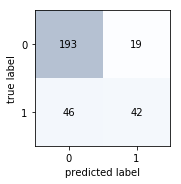

In [23]:
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

In [24]:
(192 + 40 ) / len(y_test)

0.7733333333333333

In [25]:
pipe.score(X_test, y_test)

0.77333333333333332

In [17]:
y_test_prob.shape

(300, 2)

In [19]:
pd.DataFrame(y_test_prob).head(6)

0         1
0  0.762515  0.237485
1  0.929901  0.070099
2  0.690424  0.309576
3  0.542184  0.457816
4  0.837909  0.162091
5  0.834988  0.165012

(<matplotlib.figure.Figure at 0x1a130fc3c8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a12f72b00>)

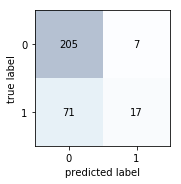

In [25]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_prob >= 0.7, 1, 0)
result = pd.DataFrame({"true": y_test, 
            "prob": y_test_prob, 
                      "predicted": y_test_pred})
result.sample(10)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

In [27]:
pd.Series(y_train).value_counts()

0    488
1    212
dtype: int64

In [29]:
baseline_accuracy = 488 / len(y_train)
baseline_accuracy

0.6971428571428572

In [31]:
pd.Series(y_test).value_counts()

0    212
1     88
dtype: int64

In [32]:
212 / len(y_test)

0.7066666666666667

In [34]:
test_accuracy = metrics.accuracy_score(y_test, y_test_pred)
test_accuracy

0.73999999999999999

(0.42613636363636365, 0.85227272727272729)

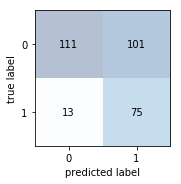

In [40]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_prob >= 0.2, 1, 0)
result = pd.DataFrame({"true": y_test, 
            "prob": y_test_prob, 
                      "predicted": y_test_pred})
result.sample(10)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))
precision = metrics.precision_score(y_test, y_test_pred) 
recall = metrics.recall_score(y_test, y_test_pred)
precision, recall

In [42]:
metrics.roc_curve?

In [43]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob)

Text(0,0.5,'TPR')

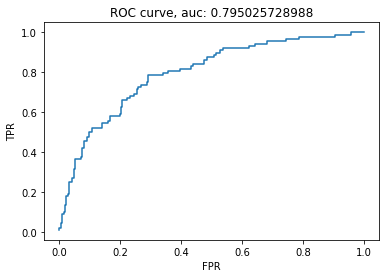

In [47]:
plt.plot(fpr, tpr)
plt.title("ROC curve, auc: " + str(metrics.auc(fpr, tpr)))
plt.xlabel("FPR")
plt.ylabel("TPR")
